<a href="https://colab.research.google.com/github/indhu68/intro_to_ML_HW5_updated/blob/main/Intro_to_ML_HW5_IG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Introduction to Machine Learning
                      Homework 5

Name : Indhuja Gudluru

Student ID : 801366046

Problem 1:

1. In our temperature prediction example, let’s change our model to a nonlinear system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b.

1.a Modify the training loop properly to accommodate this redefinition.

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [4]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [5]:
def loss(t_p, t_c):
    mean_square_error = torch.mean((t_p - t_c)**2)
    root_mean_square_error= torch.sqrt(mean_square_error)
    return root_mean_square_error

In [6]:
def plot_predictions(t_u, t_c, t_p):
    plt.figure()
    plt.xlabel('Temperature (Fahrenheit)')
    plt.ylabel('Temperature (Celsius)')
    plt.plot(t_u.numpy(), t_p.detach().numpy(), color='navy', label='Model Predictions')
    plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Actual Data')
    plt.legend()
    plt.show()


In [7]:
w2 = torch.tensor([1.0], requires_grad=True)
w1 = torch.tensor([0.0], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

In [8]:
def training_loop_sgd(n_epochs, learning_rate, w2, w1, b, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, w2, w1, b)
        losses = loss(t_p, t_c)

        losses.backward()

        with torch.no_grad():
            w2 -= learning_rate * w2.grad
            w1 -= learning_rate * w1.grad
            b -= learning_rate * b.grad

            w2.grad.zero_()
            w1.grad.zero_()
            b.grad.zero_()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Learning Rate {learning_rate}, Loss {float(losses)}')

    print(f'Final parameters with SGD at learning rate {learning_rate}: w2={w2.item()}, w1={w1.item()}, b={b.item()}')
    plot_predictions(t_u, t_c, model(t_u, w2, w1, b))
    return w2, w1, b


Training with SGD, Learning Rate: 0.1
Epoch 500, Learning Rate 0.1, Loss 65.28685760498047
Epoch 1000, Learning Rate 0.1, Loss 60.898948669433594
Epoch 1500, Learning Rate 0.1, Loss 59.434425354003906
Epoch 2000, Learning Rate 0.1, Loss 58.92238235473633
Epoch 2500, Learning Rate 0.1, Loss 58.741329193115234
Epoch 3000, Learning Rate 0.1, Loss 58.67654800415039
Epoch 3500, Learning Rate 0.1, Loss 58.653377532958984
Epoch 4000, Learning Rate 0.1, Loss 58.64476013183594
Epoch 4500, Learning Rate 0.1, Loss 58.641334533691406
Epoch 5000, Learning Rate 0.1, Loss 58.64033126831055
Final parameters with SGD at learning rate 0.1: w2=2.292440176010132, w1=-0.7807767391204834, b=-1.6279966831207275


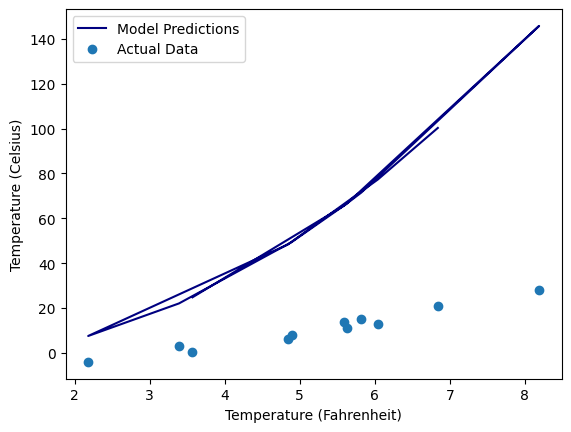

Training with SGD, Learning Rate: 0.01
Epoch 500, Learning Rate 0.01, Loss 5.8639020919799805
Epoch 1000, Learning Rate 0.01, Loss 5.863959312438965
Epoch 1500, Learning Rate 0.01, Loss 5.863964557647705
Epoch 2000, Learning Rate 0.01, Loss 5.8639631271362305
Epoch 2500, Learning Rate 0.01, Loss 5.863966464996338
Epoch 3000, Learning Rate 0.01, Loss 5.863963603973389
Epoch 3500, Learning Rate 0.01, Loss 5.863961219787598
Epoch 4000, Learning Rate 0.01, Loss 5.863964080810547
Epoch 4500, Learning Rate 0.01, Loss 5.863964080810547
Epoch 5000, Learning Rate 0.01, Loss 5.8639607429504395
Final parameters with SGD at learning rate 0.01: w2=0.44177961349487305, w1=-1.0743083953857422, b=-1.6652692556381226


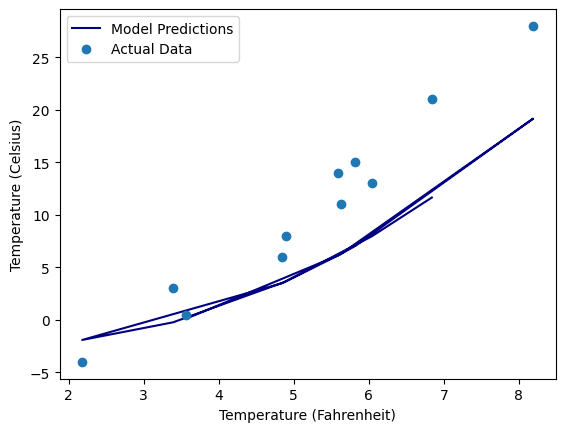

Training with SGD, Learning Rate: 0.001
Epoch 500, Learning Rate 0.001, Loss 2.3855533599853516
Epoch 1000, Learning Rate 0.001, Loss 2.146308422088623
Epoch 1500, Learning Rate 0.001, Loss 2.0157828330993652
Epoch 2000, Learning Rate 0.001, Loss 1.9522961378097534
Epoch 2500, Learning Rate 0.001, Loss 1.9228103160858154
Epoch 3000, Learning Rate 0.001, Loss 1.9087203741073608
Epoch 3500, Learning Rate 0.001, Loss 1.9012272357940674
Epoch 4000, Learning Rate 0.001, Loss 1.8964908123016357
Epoch 4500, Learning Rate 0.001, Loss 1.8928980827331543
Epoch 5000, Learning Rate 0.001, Loss 1.8897809982299805
Final parameters with SGD at learning rate 0.001: w2=0.6261847019195557, w1=-1.328069806098938, b=-0.8903230428695679


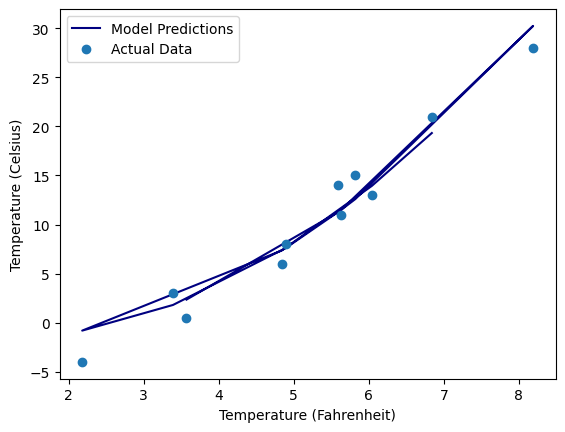

Training with SGD, Learning Rate: 0.0001
Epoch 500, Learning Rate 0.0001, Loss 2.715428113937378
Epoch 1000, Learning Rate 0.0001, Loss 2.6732070446014404
Epoch 1500, Learning Rate 0.0001, Loss 2.6323323249816895
Epoch 2000, Learning Rate 0.0001, Loss 2.5928196907043457
Epoch 2500, Learning Rate 0.0001, Loss 2.5546836853027344
Epoch 3000, Learning Rate 0.0001, Loss 2.517935037612915
Epoch 3500, Learning Rate 0.0001, Loss 2.4825809001922607
Epoch 4000, Learning Rate 0.0001, Loss 2.4486241340637207
Epoch 4500, Learning Rate 0.0001, Loss 2.4160642623901367
Epoch 5000, Learning Rate 0.0001, Loss 2.384896993637085
Final parameters with SGD at learning rate 0.0001: w2=0.4736710786819458, w1=-0.46741580963134766, b=-0.194593146443367


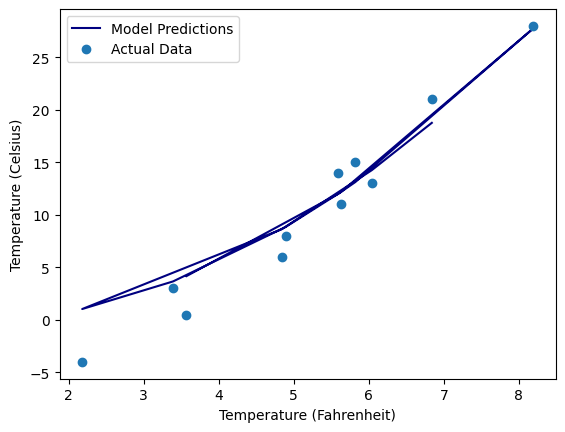

In [9]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    w2, w1, b = torch.tensor([1.0], requires_grad=True), torch.tensor([0.0], requires_grad=True), torch.tensor([0.0], requires_grad=True)
    print(f"Training with SGD, Learning Rate: {lr}")
    training_loop_sgd(n_epochs=5000, learning_rate=lr, w2=w2, w1=w1, b=b, t_u=0.1*t_u, t_c=t_c)


In [485]:
w2 = torch.tensor([1.0], requires_grad=True)
w1 = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

In [486]:
def training_loop_adam(n_epochs, learning_rate, w2, w1, b, t_u, t_c):
    optimizer = torch.optim.Adam([w2, w1, b], lr=learning_rate)

    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, w2, w1, b)
        losses = loss(t_p, t_c)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Learning Rate {learning_rate}, Loss {float(losses)}')

    print(f'Final parameters with ADAM at learning rate {learning_rate}: w2={w2.item()}, w1={w1.item()}, b={b.item()}')
    plot_predictions(t_u, t_c, model(t_u, w2, w1, b))
    return w2, w1, b


Training with ADAM, Learning Rate: 0.1
Epoch 500, Learning Rate 0.1, Loss 1.486279010772705
Epoch 1000, Learning Rate 0.1, Loss 1.4466564655303955
Epoch 1500, Learning Rate 0.1, Loss 1.4459338188171387
Epoch 2000, Learning Rate 0.1, Loss 1.4506725072860718
Epoch 2500, Learning Rate 0.1, Loss 1.4466171264648438
Epoch 3000, Learning Rate 0.1, Loss 1.4461296796798706
Epoch 3500, Learning Rate 0.1, Loss 1.4471527338027954
Epoch 4000, Learning Rate 0.1, Loss 1.4493510723114014
Epoch 4500, Learning Rate 0.1, Loss 1.450139045715332
Epoch 5000, Learning Rate 0.1, Loss 1.446142315864563
Final parameters with ADAM at learning rate 0.1: w2=0.2827169895172119, w1=2.4757158756256104, b=-10.649949073791504


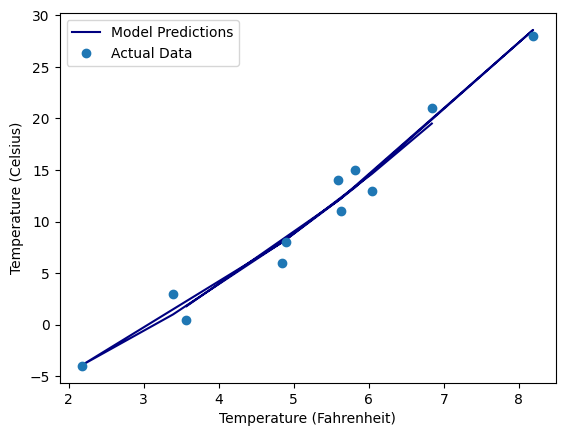

Training with ADAM, Learning Rate: 0.01
Epoch 500, Learning Rate 0.01, Loss 1.8289999961853027
Epoch 1000, Learning Rate 0.01, Loss 1.6426218748092651
Epoch 1500, Learning Rate 0.01, Loss 1.603309154510498
Epoch 2000, Learning Rate 0.01, Loss 1.56034517288208
Epoch 2500, Learning Rate 0.01, Loss 1.5195246934890747
Epoch 3000, Learning Rate 0.01, Loss 1.4864022731781006
Epoch 3500, Learning Rate 0.01, Loss 1.4641804695129395
Epoch 4000, Learning Rate 0.01, Loss 1.4523416757583618
Epoch 4500, Learning Rate 0.01, Loss 1.447575569152832
Epoch 5000, Learning Rate 0.01, Loss 1.4462144374847412
Final parameters with ADAM at learning rate 0.01: w2=0.2913707196712494, w1=2.3852925300598145, b=-10.42226505279541


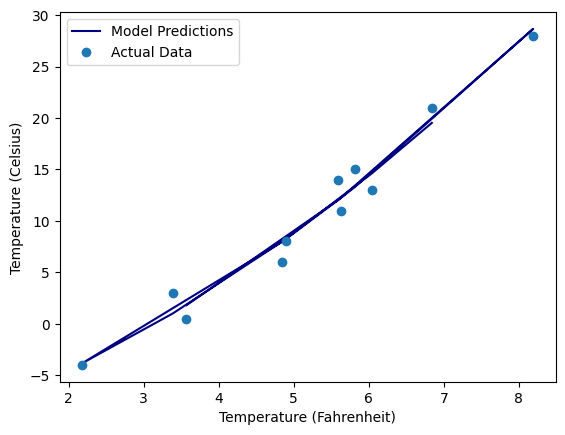

Training with ADAM, Learning Rate: 0.001
Epoch 500, Learning Rate 0.001, Loss 11.920578956604004
Epoch 1000, Learning Rate 0.001, Loss 3.5819077491760254
Epoch 1500, Learning Rate 0.001, Loss 3.3333852291107178
Epoch 2000, Learning Rate 0.001, Loss 3.0309646129608154
Epoch 2500, Learning Rate 0.001, Loss 2.69288969039917
Epoch 3000, Learning Rate 0.001, Loss 2.350797414779663
Epoch 3500, Learning Rate 0.001, Loss 2.0519163608551025
Epoch 4000, Learning Rate 0.001, Loss 1.8441441059112549
Epoch 4500, Learning Rate 0.001, Loss 1.7384787797927856
Epoch 5000, Learning Rate 0.001, Loss 1.6992603540420532
Final parameters with ADAM at learning rate 0.001: w2=0.5194195508956909, w1=-0.20980507135391235, b=-3.533837080001831


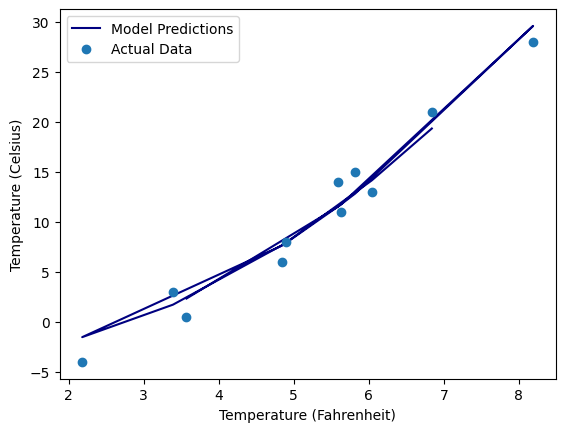

Training with ADAM, Learning Rate: 0.0001
Epoch 500, Learning Rate 0.0001, Loss 29.4014835357666
Epoch 1000, Learning Rate 0.0001, Loss 27.419313430786133
Epoch 1500, Learning Rate 0.0001, Loss 25.440967559814453
Epoch 2000, Learning Rate 0.0001, Loss 23.467281341552734
Epoch 2500, Learning Rate 0.0001, Loss 21.499347686767578
Epoch 3000, Learning Rate 0.0001, Loss 19.53888702392578
Epoch 3500, Learning Rate 0.0001, Loss 17.588603973388672
Epoch 4000, Learning Rate 0.0001, Loss 15.652212142944336
Epoch 4500, Learning Rate 0.0001, Loss 13.735755920410156
Epoch 5000, Learning Rate 0.0001, Loss 11.849199295043945
Final parameters with ADAM at learning rate 0.0001: w2=0.5028442740440369, w1=1.5004512071609497, b=-0.5029157996177673


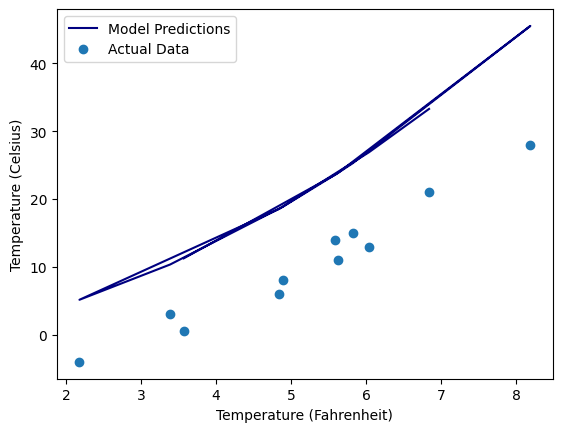

In [487]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    w2, w1, b = torch.tensor([1.0], requires_grad=True), torch.tensor([2.0], requires_grad=True), torch.tensor([0.0], requires_grad=True)
    print(f"Training with ADAM, Learning Rate: {lr}")
    training_loop_adam(n_epochs=5000, learning_rate=lr, w2=w2, w1=w1, b=b, t_u=0.1*t_u, t_c=t_c)


Problem 2:

2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation, use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model based on the above input variables. In this case, you will have six parameters:

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.

2.c. Compare your results against the linear regression done in homework 1. Do you see meaningful differences?

In [10]:
url = 'https://raw.githubusercontent.com/indhu68/intro_to_ML_HW5/main/Housing.csv'
data = pd.read_csv(url)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
input_data = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_data = 'price'
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
data[input_data] = X_scaler.fit_transform(data[input_data])
data[[output_data]] = Y_scaler.fit_transform(data[[output_data]])

In [12]:
X = data[input_data].values
Y = data[[output_data]].values

In [13]:
def model2(X, W, B):
    return torch.sum(X*W, dim=1) + B

In [14]:
def loss2(t_p, t_c):
    rmse = (t_p - t_c)**2
    return rmse.mean()

In [15]:
def training_loop(n_epochs, optimizer, W, B, X_training, X_testing, Y_training, Y_testing):
    training_losses = []
    testing_losses = []
    for epoch in range(1, n_epochs + 1):
        Y_model_training = model2(X_training, W, B)
        train_loss = loss2(Y_model_training, Y_training)

        Y_model_testing = model2(X_training, W, B)
        test_loss = loss2(Y_model_testing, Y_testing)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            training_losses.append(train_loss)
            testing_losses.append(test_loss)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {test_loss.item():.4f}")

    return W, B, training_losses, testing_losses

In [16]:
def model_training(X, Y, epochs, optimizer, learning_rate):
  X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size=0.2, random_state=42)
  X_train_tensor = torch.tensor(X_training)
  Y_train_tensor =  torch.tensor(Y_training)
  X_test_tensor =  torch.tensor(X_testing)
  Y_test_tensor=  torch.tensor(Y_testing)

  w = X.shape[1]
  W = torch.tensor([1.0] * w, requires_grad=True)
  B = torch.tensor([0.0], requires_grad=True)
  if optimizer == 'SGD':
    optimizer = optim.SGD([W, B], lr=learning_rate)
  elif optimizer == 'ADAM':
    optimizer = optim.Adam([W, B], lr=learning_rate)

  W, B, train_losses, test_losses = training_loop(
                                n_epochs = epochs,
                                optimizer = optimizer,
                                W = W,
                                B = B,
                                X_training = X_train_tensor,
                                X_testing = X_test_tensor,
                                Y_training = Y_train_tensor,
                                Y_testing = Y_test_tensor)
  return W, B, train_losses, test_losses

Training with SGD at learning rate: 0.1
Epoch 500, Training loss 0.0235, Validation loss 0.0390
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386
Training with SGD at learning rate: 0.01
Epoch 500, Training loss 0.0900, Validation loss 0.1071
Epoch 1000, Training loss 0.0447, Validation loss 0.0610
Epoch 1500, Training loss 0.0326, Validation loss 0.0485
Epoch 2000, Training loss 0.0284, Validation loss 0.0441
Epoch 2500, Training loss 0.0263, Validation loss 0.0420
Epoch 3000, Training loss 0.0252, Validation loss 0.0407
Epoch 350

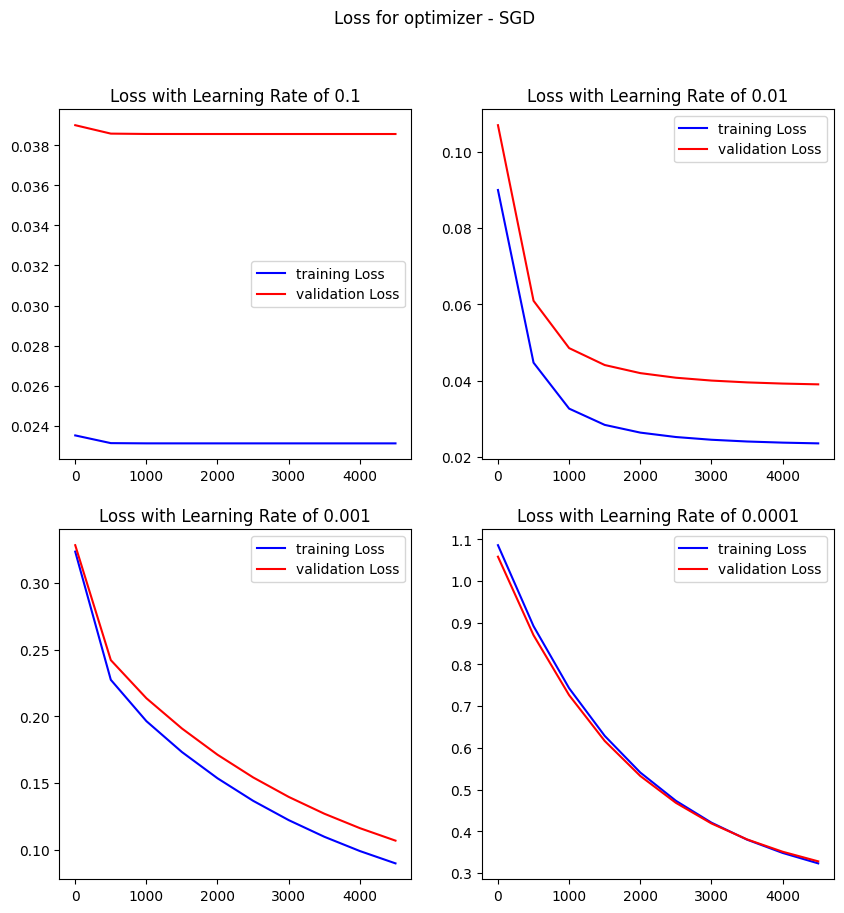

In [17]:
print(f"Training with SGD at learning rate: {0.1}")
W_SGD1, B_SGD1, train_loss_SGD1, test_loss_SGD1 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.1)
W_SGD1, B_SGD1
print(f"Training with SGD at learning rate: {0.01}")
W_SGD2, B_SGD2, train_loss_SGD2, test_loss_SGD2 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)
W_SGD2, B_SGD2
print(f"Training with SGD at learning rate: {0.001}")
W_SGD3, B_SGD3, train_loss_SGD3, test_loss_SGD3 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.001)
W_SGD3, B_SGD3
print(f"Training with SGD at learning rate: {0.0001}")
W_SGD4, B_SGD4, train_loss_SGD4, test_loss_SGD4 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)
W_SGD4, B_SGD4
epochs = range(1, 5000, 500)
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD1]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD1]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD2]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD2]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD3]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD3]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD4]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD4]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()


Training with ADAM at learning rate: 0.1
Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386
Training with ADAM at learning rate: 0.01
Epoch 500, Training loss 0.0266, Validation loss 0.0424
Epoch 1000, Training loss 0.0234, Validation loss 0.0389
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3

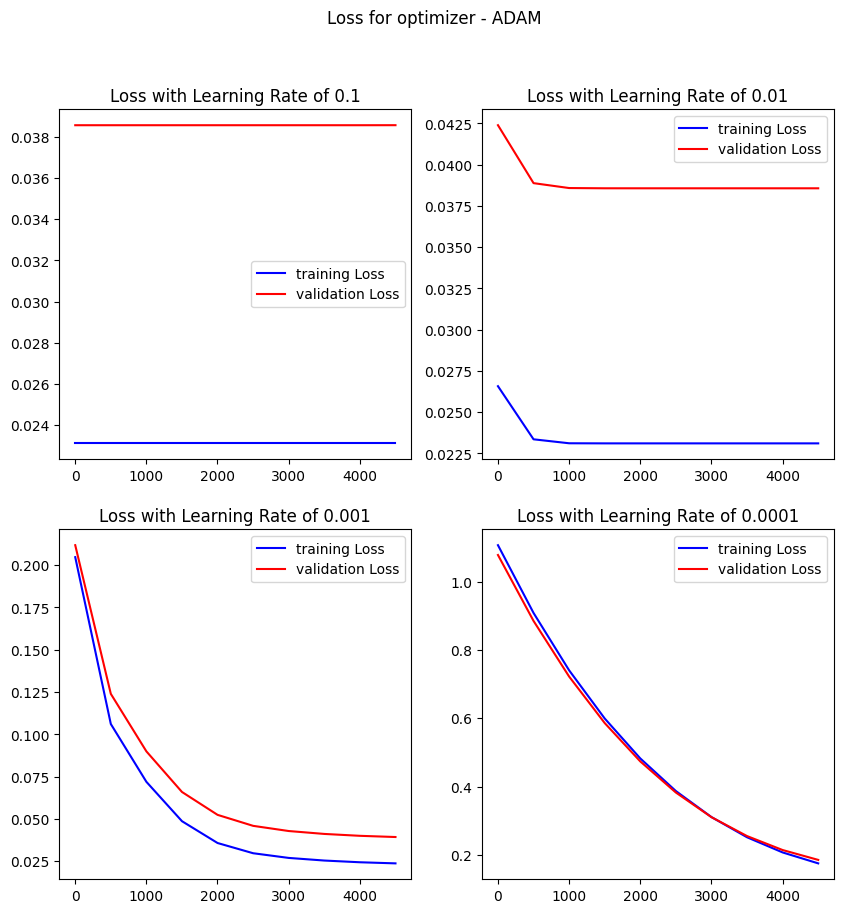

In [18]:
print(f"Training with ADAM at learning rate: {0.1}")
W_ADAM1, B_ADAM1, train_loss_ADAM1, test_loss_ADAM1 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.1)
W_ADAM1, B_ADAM1
print(f"Training with ADAM at learning rate: {0.01}")
W_ADAM2, B_ADAM2, train_loss_ADAM2, test_loss_ADAM2 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)
W_ADAM2, B_ADAM2
print(f"Training with ADAM at learning rate: {0.001}")
W_ADAM3, B_ADAM3, train_loss_ADAM3, test_loss_ADAM3 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.001)
W_ADAM3, B_ADAM3
print(f"Training with ADAM at learning rate: {0.0001}")
W_SGD4, B_ADAM4, train_loss_ADAM4, test_loss_ADAM4 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)
W_SGD4, B_ADAM4
epochs = range(1, 5000, 500)
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM1]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM1]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM2]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM2]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM3]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM3]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM4]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM4]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()


Problem 3 :

Repeat all sections of problem 2 using all the input features from the housing price dataset.

In [19]:
url = 'https://raw.githubusercontent.com/indhu68/intro_to_ML_HW5/main/Housing.csv'
data = pd.read_csv(url)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
data['furnishingstatus'].value_counts().unique

<bound method Series.unique of semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64>

In [21]:
data = data[data['furnishingstatus'] != 'semi-furnished']
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=False)
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,0,1


In [22]:
# Select columns of object type
f_columns = data.select_dtypes(include=['object']).columns
data[f_columns] = data[f_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [23]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X = data.drop('price', axis = 1)
Y = data[['price']]

In [24]:
X = pd.DataFrame(X_scaler.fit_transform(X), columns=X.columns, index=X.index).values
Y = pd.DataFrame(Y_scaler.fit_transform(Y), columns=Y.columns, index=Y.index).values

Training with SGD at learning rate: 0.1
Epoch 500, Training loss 0.0315, Validation loss 0.0312
Epoch 1000, Training loss 0.0312, Validation loss 0.0309
Epoch 1500, Training loss 0.0312, Validation loss 0.0309
Epoch 2000, Training loss 0.0312, Validation loss 0.0309
Epoch 2500, Training loss 0.0312, Validation loss 0.0309
Epoch 3000, Training loss 0.0312, Validation loss 0.0309
Epoch 3500, Training loss 0.0312, Validation loss 0.0309
Epoch 4000, Training loss 0.0312, Validation loss 0.0309
Epoch 4500, Training loss 0.0312, Validation loss 0.0309
Epoch 5000, Training loss 0.0312, Validation loss 0.0309
Training with SGD at learning rate: 0.01
Epoch 500, Training loss 0.0925, Validation loss 0.0932
Epoch 1000, Training loss 0.0524, Validation loss 0.0524
Epoch 1500, Training loss 0.0411, Validation loss 0.0410
Epoch 2000, Training loss 0.0365, Validation loss 0.0363
Epoch 2500, Training loss 0.0342, Validation loss 0.0340
Epoch 3000, Training loss 0.0330, Validation loss 0.0328
Epoch 350

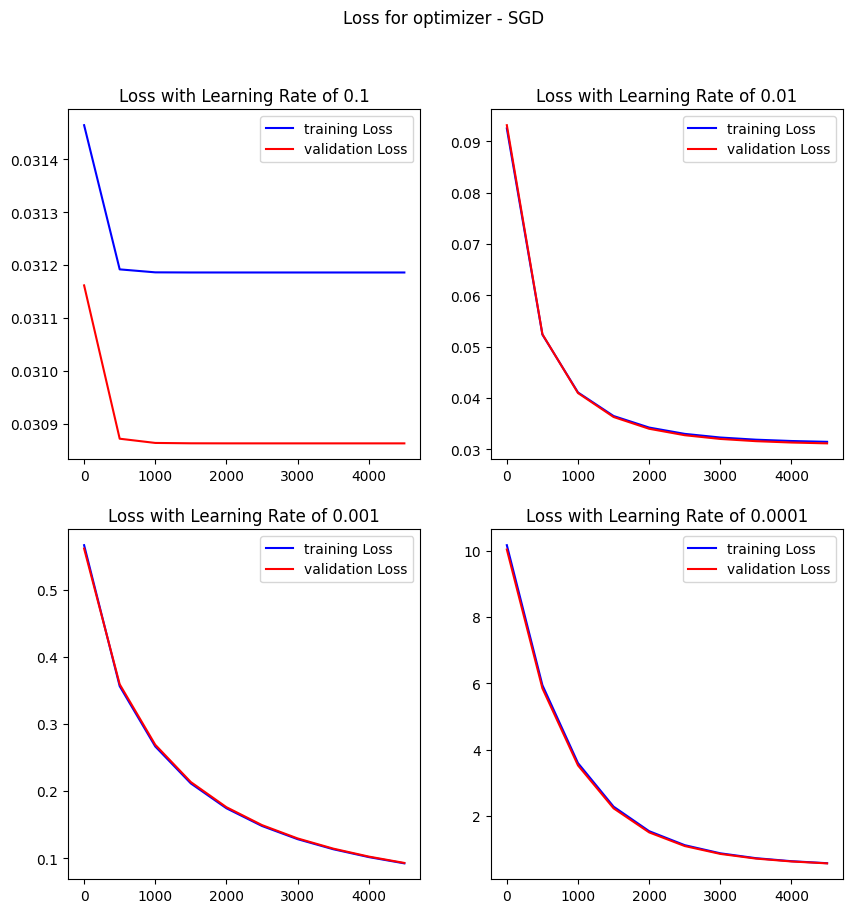

In [29]:
print(f"Training with SGD at learning rate: {0.1}")
W_SGD1, B_SGD1, train_loss_SGD1, test_loss_SGD1 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.1)
W_SGD1, B_SGD1
print(f"Training with SGD at learning rate: {0.01}")
W_SGD2, B_SGD2, train_loss_SGD2, test_loss_SGD2 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)
W_SGD2, B_SGD2
print(f"Training with SGD at learning rate: {0.001}")
W_SGD3, B_SGD3, train_loss_SGD3, test_loss_SGD3 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.001)
W_SGD3, B_SGD3
print(f"Training with SGD at learning rate: {0.0001}")
W_SGD4, B_SGD4, train_loss_SGD4, test_loss_SGD4 = model_training(X, Y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)
W_SGD4, B_SGD4
epochs = range(1, 5000, 500)
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD1]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD1]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD2]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD2]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD3]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD3]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_SGD4]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_SGD4]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()


Training with ADAM at learning rate: 0.1
Epoch 500, Training loss 0.0312, Validation loss 0.0309
Epoch 1000, Training loss 0.0312, Validation loss 0.0309
Epoch 1500, Training loss 0.0312, Validation loss 0.0309
Epoch 2000, Training loss 0.0312, Validation loss 0.0309
Epoch 2500, Training loss 0.0312, Validation loss 0.0309
Epoch 3000, Training loss 0.0312, Validation loss 0.0309
Epoch 3500, Training loss 0.0312, Validation loss 0.0309
Epoch 4000, Training loss 0.0312, Validation loss 0.0309
Epoch 4500, Training loss 0.0312, Validation loss 0.0309
Epoch 5000, Training loss 0.0312, Validation loss 0.0309
Training with ADAM at learning rate: 0.01
Epoch 500, Training loss 0.0474, Validation loss 0.0482
Epoch 1000, Training loss 0.0348, Validation loss 0.0348
Epoch 1500, Training loss 0.0322, Validation loss 0.0320
Epoch 2000, Training loss 0.0314, Validation loss 0.0312
Epoch 2500, Training loss 0.0312, Validation loss 0.0309
Epoch 3000, Training loss 0.0312, Validation loss 0.0309
Epoch 3

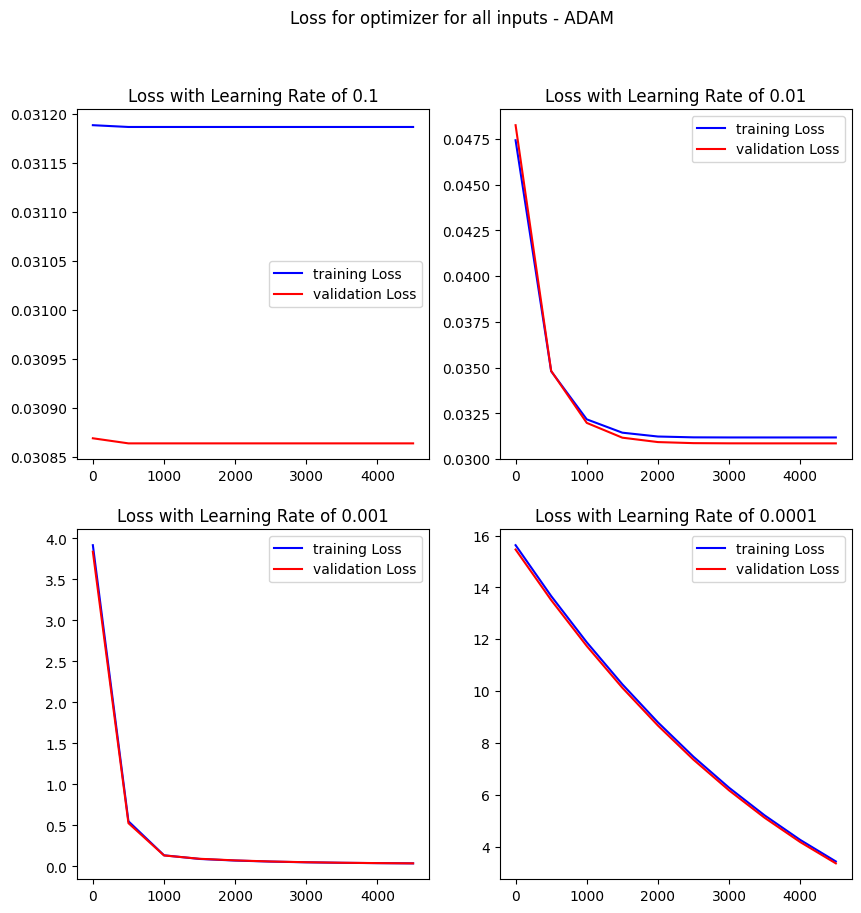

In [28]:
print(f"Training with ADAM at learning rate: {0.1}")
W_ADAM1, B_ADAM1, train_loss_ADAM1, test_loss_ADAM1 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.1)
W_ADAM1, B_ADAM1
print(f"Training with ADAM at learning rate: {0.01}")
W_ADAM2, B_ADAM2, train_loss_ADAM2, test_loss_ADAM2 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)
W_ADAM2, B_ADAM2
print(f"Training with ADAM at learning rate: {0.001}")
W_ADAM3, B_ADAM3, train_loss_ADAM3, test_loss_ADAM3 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.001)
W_ADAM3, B_ADAM3
print(f"Training with ADAM at learning rate: {0.0001}")
W_SGD4, B_ADAM4, train_loss_ADAM4, test_loss_ADAM4 = model_training(X, Y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)
W_SGD4, B_ADAM4

plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM1]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM1]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM2]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM2]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM3]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM3]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_ADAM4]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in test_loss_ADAM4]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()
